In [1]:
import os
os.chdir("..")
print("Current Directory:", os.getcwd())

Current Directory: d:\workspace\iscat


In [2]:
from src.data_processing.utils import Utils
data_path = os.path.join('data', 'iScat', 'Data', '2024_11_11', 'Metasurface', 'Chip_02')
image_paths,target_paths = Utils.get_data_paths(data_path)

In [3]:
# Utils.generate_np_masks(target_paths)

In [4]:
target_paths

[('data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\Captured Cy5.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\Captured FITC.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\Captured TRITC.tif'),
 ('data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\Captured Cy5.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\Captured FITC.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\Captured TRITC.tif'),
 ('data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\Captured Cy5.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\Captured FITC.tif',
  'data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\Captured TRITC.tif'),
 ('data\\iScat\\Data\\2024_11_11\\Metasurface\\Chip_

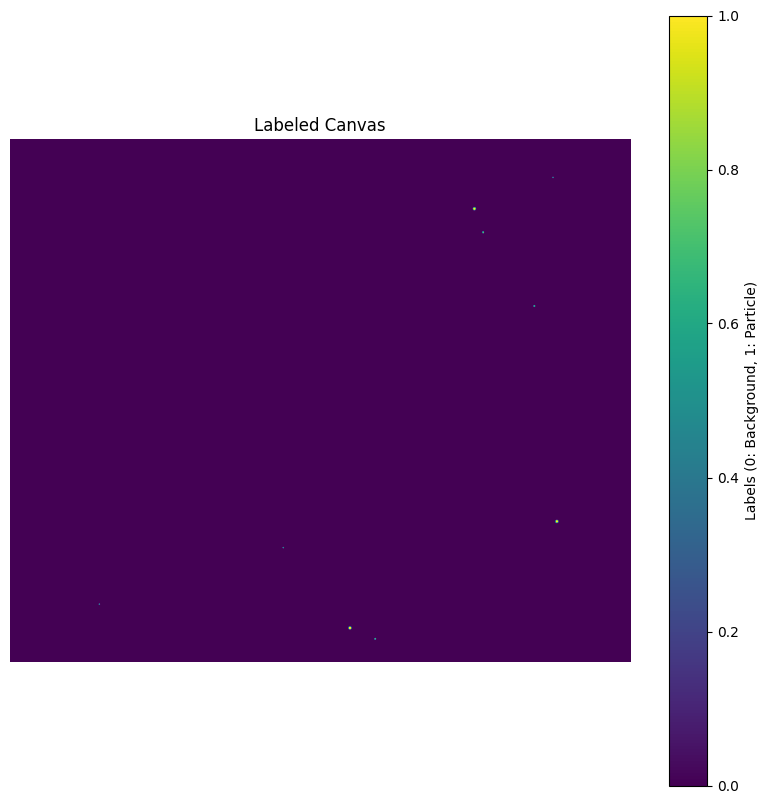

In [19]:
a=Utils.load_np_masks(target_paths,[2])
# Utils.visualize_labeled_canvas(a[0][:300,:300])
Utils.visualize_labeled_canvas(a[0][:,:])

In [22]:
from src.data_processing.dataset import iScatDataset
import torch
DEVICE= 'cuda' if torch.cuda.is_available() else 'cpu'
image_size=256
train_dataset = iScatDataset(image_paths[:-1], target_paths[:-1], preload_image=True,image_size = (image_size,image_size),apply_augmentation=True,normalize=False,device=DEVICE)
valid_dataset = iScatDataset([image_paths[-1]],[target_paths[-1]],preload_image=True,apply_augmentation=False,normalize=False,device=DEVICE)

Loading TIFF images to Memory: 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]
